In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data
data=pd.read_csv('/content/drive/MyDrive/datasets/ANN/mobile_price_classification.csv')

# Data familiarization

In [3]:
# shape of the data
data.shape

(2000, 21)

There are 2000 rows and 21 columns in the dataset.

In [4]:
# check the first 3 rows of the data
data.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Note:
1. There are no categorical columns in the data.
2. Price range column is the target column & its a discrete numerical value
3. So its a multi class classification problem

In [5]:
# check the last 3 rows of the data
data.tail(3)

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [6]:
# info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

Note:
1. There is no null values in the dataset
2. all are numeric columns

In [7]:
# lets check the statistic summary of the dataset
data.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Note:
1. There is no outliers in the dataset.

In [8]:
# check the target values
data.price_range.value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

Note: There are 4 classes in the target variable.

# Preprocessing

In [9]:
df=data.copy()

In [10]:
# check for null values
df.isna().sum()


battery_power     0
bluetooth         0
clock_speed       0
dual_sim          0
front_cam         0
4G                0
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
primary_camera    0
px_height         0
px_width          0
ram               0
sc_h              0
sc_w              0
talk_time         0
three_g           0
touch_screen      0
wifi              0
price_range       0
dtype: int64

Note: No null values in the dataset

In [11]:
# check the unique values in each column
df.nunique()

battery_power     1094
bluetooth            2
clock_speed         26
dual_sim             2
front_cam           20
4G                   2
int_memory          63
m_dep               10
mobile_wt          121
n_cores              8
primary_camera      21
px_height         1137
px_width          1109
ram               1562
sc_h                15
sc_w                19
talk_time           19
three_g              2
touch_screen         2
wifi                 2
price_range          4
dtype: int64

In [12]:
# columns in the dataset
df.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_cam',
       '4G', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'primary_camera',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Text(0.5, 1.0, 'Outliers in the dataset')

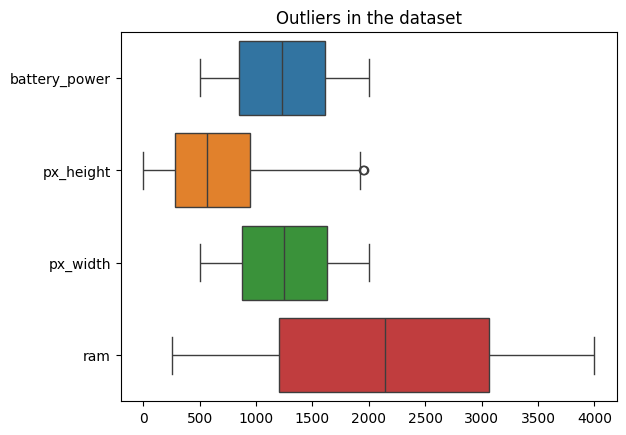

In [13]:
# Outliers in the dataset

sns.boxplot(data=df[['battery_power','px_height', 'px_width', 'ram']],orient='h')
plt.title('Outliers in the dataset')

Note:
1. These are the continuous numeric columns in the dataset, 'battery_power','px_height', 'px_width', 'ram'
2. There is no outliers in the dataset

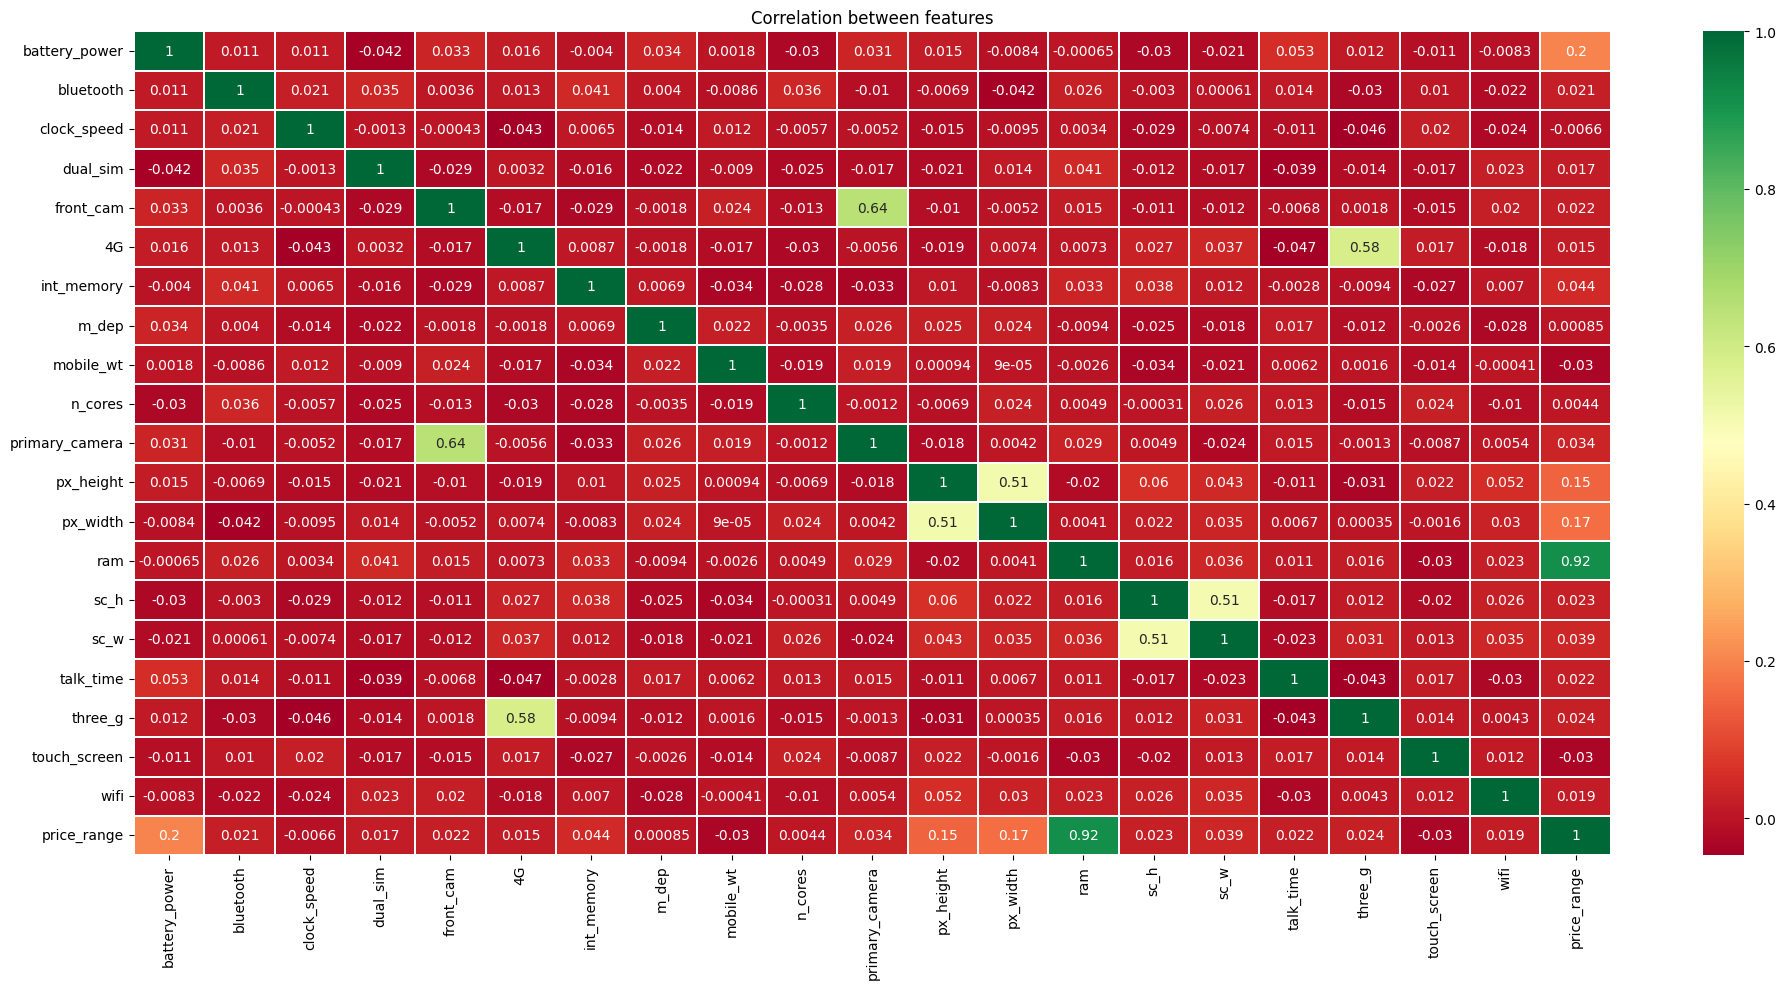

In [14]:
#lets check the collinearity between column
# plot heatmap
plt.figure(figsize=(20,10))
plt.title('Correlation between features')
sns.heatmap(df.corr(),linewidths=0.2, cmap='RdYlGn',annot=True)
plt.tight_layout()
plt.show()

Note: Ram is highly correlated with target variable

# Split the daatset inro X & y

In [15]:
y= df['price_range']
x=df.drop('price_range',axis=1)

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.models import Sequential# to create a nueral nw by stacking layers one by one
# to connect every neuron from  previous layer to subseding layer
from tensorflow.keras.layers import Dense

In [17]:
!pip install scikeras

# Model training & prediction

In [57]:
# Predict the result & calculate accuracy score
# split the data into train & test set
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42)

In [55]:
# create a function to return the model
def create_model(optimizer='adam'):
  # create model
  model = Sequential()
  model.add(Dense(28, input_shape=(20,), activation ='relu'))
  #The output layer uses the softmax activation function rather than the sigmoid activation function.
  #Each neuron in the output layer yields a probability for the corresponding class
  # the sum of all the probabilities is 1.0
  model.add(Dense(4, activation='softmax'))
  #compile
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

In [60]:
# fit the train data to the model
model_ref=create_model()
model_ref.fit(x_train,to_categorical(y_train),epochs = 50)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1552 - loss: 445.5888
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3792 - loss: 62.8373
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4717 - loss: 28.2970
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4932 - loss: 18.5542
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5067 - loss: 14.3249
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5031 - loss: 11.7907
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5258 - loss: 9.5544
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5586 - loss: 7.8335
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5557 - loss: 6.6508
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5725 - loss: 5.4566
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5750 - loss: 4.9681
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5819 - loss: 

In [61]:
# predict the x_test values
y_pred=model_ref.predict(x_test)
y_pred=y_pred.argmax(axis=1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [63]:
# calculate the accuracy score
from sklearn.metrics import accuracy_score # test accuracy
accuracy_score(y_test,y_pred)

0.622

# Hyper Parameter tuning

In [18]:
from scikeras.wrappers import KerasClassifier

In [21]:
df.shape # shape of the dataset

(2000, 21)

In [48]:
# we must one-hot-encode the labels
# Keras provides a utility function named to_categorical for just that purpose
from tensorflow.keras.utils import to_categorical

to_categorical(y)[:10]

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [49]:
# model initialise with random weights & bias
# to fix the random wight & bias as constatnt
# to fix reproducibility we use seed number
import tensorflow as tf

seed=7
tf.random.set_seed(seed)

In [50]:
# create the model
model = KerasClassifier(model = create_model, batch_size = 10, verbose = 0)

In [51]:
# defining the parameters

optimizer = ['SGD','Adam','Adamax','Nadam']
epochs = [10,20,30]
learn_rate = [0.001,0.01,0.1,0.2,0.3]
param_grid= dict(model__optimizer = optimizer,optimizer__learning_rate = learn_rate,epochs = epochs)

In [52]:
# use grid search cv to get the best parametrs
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs =-1, cv=3,error_score='raise')
grid_result = grid.fit(x,to_categorical(y))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
grid_result.best_params_

{'epochs': 20, 'model__optimizer': 'Nadam', 'optimizer__learning_rate': 0.01}

In [54]:
grid_result.best_score_

0.6584950767859313

Note: We got an accuracy score of 0.622 before doing hyperparameter tuning (HT), but the accuracy score obtained after HT is 0.658.